<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据分组" data-toc-modified-id="数据分组-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据分组</a></span><ul class="toc-item"><li><span><a href="#筛选列" data-toc-modified-id="筛选列-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>筛选列</a></span></li><li><span><a href="#可以通过遍历的方法,-将DataFrameGroupBy中的数据打印出来" data-toc-modified-id="可以通过遍历的方法,-将DataFrameGroupBy中的数据打印出来-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>可以通过遍历的方法, 将DataFrameGroupBy中的数据打印出来</a></span></li></ul></li><li><span><a href="#高级方法(选学):" data-toc-modified-id="高级方法(选学):-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>高级方法(选学):</a></span></li></ul></div>

我们经常需要对某些标签或索引的局部进行累计分析, 这时就需要用到 groupby 了.

实际上,我们可以把 groupby 理解成一个分割(split),应用(apply),组合(combine)的过程.

一个经典分割-应用-组合操作如下图所示,其中应用的是一个求和函数.

- **分割**: 将 DataFrame按照指定的键分割成若干组
- **应用**: 对每个组应用函数, 通常是累计,转换或过滤函数
- **组合**: 将每一组的结果合并成一个输出组

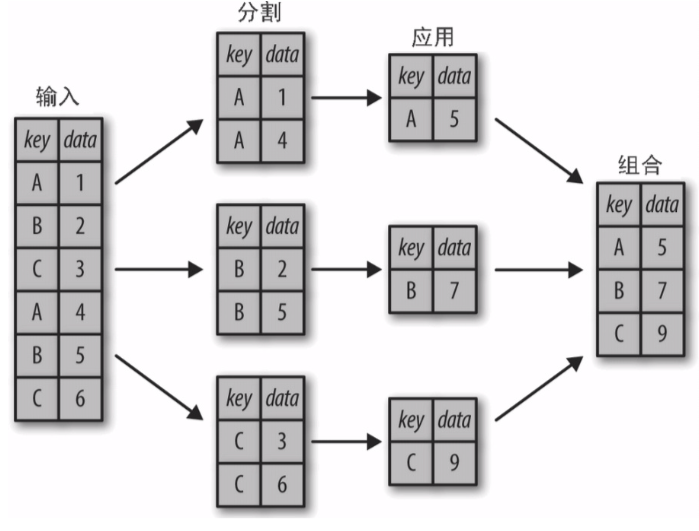

## 数据分组

在数据处理中, 我们经常需要把某些特征的共同值进行累计分析.

例如有一列特征, 储存的是用户学历数据, 分为, 初中, 高中, 大学

我们经常做的一件事情是, 将初中的, 高中, 大学的都各自分为一组, 然后统计每一组中的不同统计量的值.

In [1]:
import numpy as np
import pandas as pd

In [3]:
data = {
    '学历':['高中生', '大学生', '高中生', '高中生', '高中生', '大学生', '大学生','研究生','研究生','大学生'], 
    '测试成绩':[65, 67, 44, 58, 55, 77, 76,82,91,56], # 答题结果
    '产品评分':[3,1,3,2,3,1,3,3,2,2] # 1-3分  1:差  2:一般  3:优秀
} 
df = pd.DataFrame(data);df # 数据是对我们的一款在线答题产品的测试数据

,学历,测试成绩,产品评分
0,高中生,65,3
1,大学生,67,1
2,高中生,44,3
3,高中生,58,2
4,高中生,55,3
5,大学生,77,1
6,大学生,76,3
7,研究生,82,3
8,研究生,91,2
9,大学生,56,2


In [4]:
df.groupby('学历') # by 以----进行分组

需要注意的是，这里的返回值不是一个 DataFrame 对象，而是一个 DataFrameGroupBy 对象。

你可以将它看成是一种特殊形式的 DataFrame，里面隐藏着若干组数据，但是在没有应用累计函数之前并不会真的计算。

我们在应用累计函数之后, 就会完成真正的计算

In [5]:
df.groupby('学历').count()

,测试成绩,产品评分
学历,,
大学生,4,4
研究生,2,2
高中生,4,4


In [6]:
df.groupby('学历').sum()

,测试成绩,产品评分
学历,,
大学生,276,7
研究生,173,5
高中生,222,11


In [7]:
df.groupby('学历').mean()

,测试成绩,产品评分
学历,,
大学生,69.0,1.75
研究生,86.5,2.50
高中生,55.5,2.75


### 筛选列

可以直接在groupby对象中选择列

In [9]:
df.groupby('学历')['产品评分'].mean()

学历
大学生    1.75
研究生    2.50
高中生    2.75
Name: 产品评分, dtype: float64

也可以统计后在选择列

In [12]:
df.groupby('学历').mean()['测试成绩']

学历
大学生    69.0
研究生    86.5
高中生    55.5
Name: 测试成绩, dtype: float64

In [13]:
df.groupby('学历').mean()['产品评分']

学历
大学生    1.75
研究生    2.50
高中生    2.75
Name: 产品评分, dtype: float64

也可以对数据中的一列进行分组, 通过数据中另外一列

In [14]:
df.产品评分

0    3
1    1
2    3
3    2
4    3
5    1
6    3
7    3
8    2
9    2
Name: 产品评分, dtype: int64

In [15]:
df.学历

0    高中生
1    大学生
2    高中生
3    高中生
4    高中生
5    大学生
6    大学生
7    研究生
8    研究生
9    大学生
Name: 学历, dtype: object

In [17]:
df.产品评分.groupby(df.学历).mean()

学历
大学生    1.75
研究生    2.50
高中生    2.75
Name: 产品评分, dtype: float64

In [81]:
df.产品评分.groupby(df.学历).mean()

学历
大学生    1.75
研究生    2.50
高中生    2.75
Name: 产品评分, dtype: float64

### 可以通过遍历的方法, 将DataFrameGroupBy中的数据打印出来

In [27]:
df

,学历,测试成绩,产品评分
0,高中生,65,3
1,大学生,67,1
2,高中生,44,3
3,高中生,58,2
4,高中生,55,3
5,大学生,77,1
6,大学生,76,3
7,研究生,82,3
8,研究生,91,2
9,大学生,56,2


In [20]:
t = df.groupby('学历')

In [28]:
a,b,c = list(df.groupby('学历'))

In [29]:
a

('大学生',     学历  测试成绩  产品评分
 1  大学生    67     1
 5  大学生    77     1
 6  大学生    76     3
 9  大学生    56     2)

In [30]:
b

('研究生',     学历  测试成绩  产品评分
 7  研究生    82     3
 8  研究生    91     2)

In [31]:
c

('高中生',     学历  测试成绩  产品评分
 0  高中生    65     3
 2  高中生    44     3
 3  高中生    58     2
 4  高中生    55     3)

In [32]:
for group_name,group_data in df.groupby('学历'):
        print(group_name)
        print("-------")
        print(group_data)
        print('---------分割线----------')

大学生
-------
    学历  测试成绩  产品评分
1  大学生    67     1
5  大学生    77     1
6  大学生    76     3
9  大学生    56     2
---------分割线----------
研究生
-------
    学历  测试成绩  产品评分
7  研究生    82     3
8  研究生    91     2
---------分割线----------
高中生
-------
    学历  测试成绩  产品评分
0  高中生    65     3
2  高中生    44     3
3  高中生    58     2
4  高中生    55     3
---------分割线----------


In [82]:
for group_name,group_data in df.groupby('学历'):
    print(group_name)
    print("-------")
    print(group_data)
    print('---------分割线----------')

大学生
-------
    学历  测试成绩  产品评分
1  大学生    67     1
5  大学生    77     1
6  大学生    76     3
9  大学生    56     2
---------分割线----------
研究生
-------
    学历  测试成绩  产品评分
7  研究生    82     3
8  研究生    91     2
---------分割线----------
高中生
-------
    学历  测试成绩  产品评分
0  高中生    65     3
2  高中生    44     3
3  高中生    58     2
4  高中生    55     3
---------分割线----------


In [33]:
df.describe()

,测试成绩,产品评分
count,10.000000,10.000000
mean,67.100000,2.300000
std,14.379383,0.823273
min,44.000000,1.000000
25%,56.500000,2.000000
50%,66.000000,2.500000
75%,76.750000,3.000000
max,91.000000,3.000000


In [34]:
df.groupby('学历').describe()

测试成绩                                                  产品评分        \
    count  mean       std   min    25%   50%    75%   max count  mean   
学历                                                                      
大学生   4.0  69.0  9.763879  56.0  64.25  71.5  76.25  77.0   4.0  1.75   
研究生   2.0  86.5  6.363961  82.0  84.25  86.5  88.75  91.0   2.0  2.50   
高中生   4.0  55.5  8.736895  44.0  52.25  56.5  59.75  65.0   4.0  2.75   

                                          
          std  min   25%  50%   75%  max  
学历                                        
大学生  0.957427  1.0  1.00  1.5  2.25  3.0  
研究生  0.707107  2.0  2.25  2.5  2.75  3.0  
高中生  0.500000  2.0  2.75  3.0  3.00  3.0

In [86]:
# 统计每一组数据的分类个数
df.groupby('学历')['产品评分'].value_counts()

学历   产品评分
大学生  1       2
     2       1
     3       1
研究生  2       1
     3       1
高中生  3       3
     2       1
Name: 产品评分, dtype: int64

In [35]:
df.groupby('学历')['产品评分'].value_counts().unstack()

产品评分,1,2,3
学历,,,
大学生,2.0,1.0,1.0
研究生,NaN,1.0,1.0
高中生,NaN,1.0,3.0


In [36]:
df

,学历,测试成绩,产品评分
0,高中生,65,3
1,大学生,67,1
2,高中生,44,3
3,高中生,58,2
4,高中生,55,3
5,大学生,77,1
6,大学生,76,3
7,研究生,82,3
8,研究生,91,2
9,大学生,56,2


## 高级方法(选学):

1. 假如对于一列,我想要同时应用多个统计函数呢?
2. 假如对于不同的列,我想要用不同的统计函数呢?
3. 应用自定义函数进行统计

In [37]:
test  = df.groupby('学历')

In [40]:
test.agg('mean')

,测试成绩,产品评分
学历,,
大学生,69.0,1.75
研究生,86.5,2.50
高中生,55.5,2.75


In [41]:
test.agg(['max','min','mean','sum','std'])

测试成绩                          产品评分                        
     max min  mean  sum       std  max min  mean sum       std
学历                                                            
大学生   77  56  69.0  276  9.763879    3   1  1.75   7  0.957427
研究生   91  82  86.5  173  6.363961    3   2  2.50   5  0.707107
高中生   65  44  55.5  222  8.736895    3   2  2.75  11  0.500000

In [91]:
test.agg(['max','min','mean']) # 列表,同时统计多个统计值

测试成绩           产品评分          
     max min  mean  max min  mean
学历                               
大学生   77  56  69.0    3   1  1.75
研究生   91  82  86.5    3   2  2.50
高中生   65  44  55.5    3   2  2.75

In [43]:
test.agg({"测试成绩":['min','max','mean'], "产品评分":['var','std','sum']})

测试成绩                产品评分              
     min max  mean       var       std sum
学历                                        
大学生   56  77  69.0  0.916667  0.957427   7
研究生   82  91  86.5  0.500000  0.707107   5
高中生   44  65  55.5  0.250000  0.500000  11

In [93]:
test.agg({"测试成绩":['mean','std','var'], "产品评分":['max','min','mean']})

测试成绩                      产品评分          
     mean       std        var  max min  mean
学历                                           
大学生  69.0  9.763879  95.333333    3   1  1.75
研究生  86.5  6.363961  40.500000    3   2  2.50
高中生  55.5  8.736895  76.333333    3   2  2.75

In [94]:
# 应用自定义的统计函数进行统计
test.apply(lambda x:print(x))

   测试成绩  产品评分
1    67     1
5    77     1
6    76     3
9    56     2
   测试成绩  产品评分
1    67     1
5    77     1
6    76     3
9    56     2
   测试成绩  产品评分
7    82     3
8    91     2
   测试成绩  产品评分
0    65     3
2    44     3
3    58     2
4    55     3


""


In [ ]:
def f(x):
    print(x)

In [95]:
test.apply(lambda x: np.sum(x) / 10)

,测试成绩,产品评分
学历,,
大学生,27.6,0.7
研究生,17.3,0.5
高中生,22.2,1.1


In [96]:
def f3(x):
    return np.mean(x) - np.min(x)

In [97]:
# 统计数据平均值 减去数据最小值
test.apply(f3)

,测试成绩,产品评分
学历,,
大学生,13.0,0.75
研究生,4.5,0.50
高中生,11.5,0.75


In [44]:
df

,学历,测试成绩,产品评分
0,高中生,65,3
1,大学生,67,1
2,高中生,44,3
3,高中生,58,2
4,高中生,55,3
5,大学生,77,1
6,大学生,76,3
7,研究生,82,3
8,研究生,91,2
9,大学生,56,2


In [45]:
a

('大学生',     学历  测试成绩  产品评分
 1  大学生    67     1
 5  大学生    77     1
 6  大学生    76     3
 9  大学生    56     2)

In [48]:
a[1]

,学历,测试成绩,产品评分
1,大学生,67,1
5,大学生,77,1
6,大学生,76,3
9,大学生,56,2


In [49]:
b[1]

,学历,测试成绩,产品评分
7,研究生,82,3
8,研究生,91,2


In [50]:
c[1]

,学历,测试成绩,产品评分
0,高中生,65,3
2,高中生,44,3
3,高中生,58,2
4,高中生,55,3


In [58]:
# 提取每一组第二大分数
def f(x): # x代表了我们将来会传进来的每一组数据
    return x['测试成绩'].sort_values(ascending=False).iloc[1]

In [59]:
# 应用自定义函数
df.groupby('学历').apply(f)

学历
大学生    76
研究生    82
高中生    58
dtype: int64

In [55]:
a[1]['测试成绩'].sort_values(ascending=False)

5    77
6    76
1    67
9    56
Name: 测试成绩, dtype: int64

In [57]:
a[1]['测试成绩'].sort_values(ascending=False).iloc[1]

76